In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')
import omama as O
import pickle
from hyperopt import hp, rand, fmin, Trials
from pyod.models.iforest import IForest

In [3]:
# load data and labels

with open('/raid/mpsych/datasetASTAR.pkl','rb') as f:
    datasetA = pickle.load(f)
    
with open('/raid/mpsych/datasetASTAR_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [4]:
# determine the hyperparameter space

param_grid = {
    'contamination': hp.uniform('contamination', 0.05, .1),
    'n_estimators': hp.uniformint('n_estimators', 1, 200),
    'max_samples': hp.uniformint('max_samples', 1, 255),
    'max_features': hp.uniformint('max_features', 1, 255),
    'bootstrap': hp.choice('bootstrap',  [True, False]),
    'n_jobs': hp.uniformint('n_jobs', 1, 4),
    'behaviour': hp.choice('behaviour', ['old', 'new']),
    'random_state': hp.uniformint('random_state', 1, 100),
}

In [5]:
hyperOpt = O.HyperTuner(
    algorithm=IForest,
    param_space=param_grid,
    feature_type='hist',
    norm_type='gaussian',
    data=datasetA,
    gt_labels=labels,
    max_evals=60,
    sigma=15,
)

HyperTuner initializing, please be patient...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [02:21<00:00,  2.36s/trial, best loss: -0.9175000000000001]
Best parameters:
behaviour: new
bootstrap: True
contamination: 0.05967550129194374
max_features: 53.0
max_samples: 172.0
n_estimators: 28.0
n_jobs: 4.0
random_state: 26.0


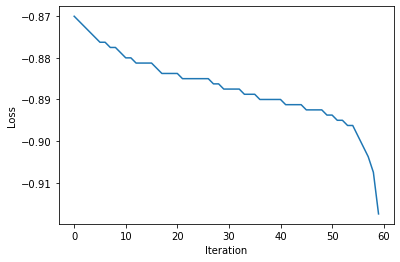

In [6]:
hyperOpt.optimize()

In [7]:
hyperOpt.display_best_params()

Best parameters:
behaviour: new
bootstrap: True
contamination: 0.05967550129194374
max_features: 53.0
max_samples: 172.0
n_estimators: 28.0
n_jobs: 4.0
random_state: 26.0


In [8]:
hyperOpt.print_param_space()

Parameter space:
contamination: ['0.05', '0.1']
n_estimators: ['1', '200', '1.0']
max_samples: ['1', '255', '1.0']
max_features: ['1', '255', '1.0']
bootstrap: ['True', 'False']
n_jobs: ['1', '4', '1.0']
behaviour: ['old', 'new']
random_state: ['1', '100', '1.0']


In [9]:
print(type(hyperOpt.param_space))

<class 'dict'>
